In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

A.  Generate 500 realizations of x 

In [2]:
def gaussian_sample(mean, variance, count):
    return np.random.normal(mean, variance**0.5, count)

def gaussian(x, mu, variance):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(variance**0.5, 2.)))

B.  Use EM algo 

In [3]:
def generate_points():
    component_1 = gaussian_sample(5, 1, 250)
    component_2 = gaussian_sample(-5, 1, 250)
    rawdata = np.concatenate([component_1, component_2])

    # set up dataframe (half are randomly assigned to gauss 1)
    #  i.e. probabilities start off = 0.5
    cols = "value gaussian".split()
    data = pd.DataFrame(rawdata, columns=['value'])
    data['pi1'] = 0.50
    data['pi2'] = 0.50
    data['p1i'] = 0.50
    data['p2i'] = 0.50

    data['assign'] = 0
    for idx, row in data.iterrows():
        if np.random.random() > 0.5:
            data.iloc[idx, data.columns.get_loc('assign')] = 1 
        else:
            data.iloc[idx, data.columns.get_loc('assign')] = 2    

    return data

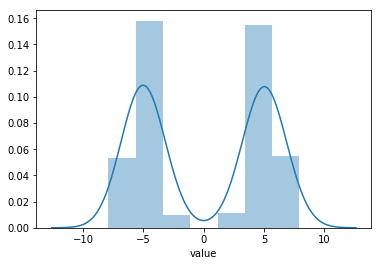

In [4]:
data = generate_points()
sns.distplot(data.value)

In [5]:
def update_parameters(data):
    
    # get mean     
    numer1 = numer2 = denom1 = denom2 = 0
    
    gaussian_1 = data[data['assign'] == 1]
    gaussian_2 = data[data['assign'] == 2]
    
    
    for index, row in gaussian_1.iterrows():
        p1 = row.pi1
        p2 = row.pi2
        
        numer1 += row.value * p1 
        denom1 += p1
        
    mu1 = numer1/denom1

    for index, row in gaussian_2.iterrows():
        p1 = row.pi1
        p2 = row.pi2
        
        numer2 += row.value * p2
        denom2 += p2 
    mu2 = numer2/denom2

    
    
    # get variance
    numer1 = numer2 = denom1 = denom2 = 0

    for index, row in gaussian_1.iterrows():
        p1 = row.pi1
        p2 = row.pi2

        numer1 += p1 * (row.value-mu1)**2
        denom1 += p1    
    sigma1 = numer1/denom1

    for index, row in gaussian_2.iterrows():
        p1 = row.pi1
        p2 = row.pi2

        numer2 += p2 * (row.value-mu2)**2
        denom2 += p2
    sigma2 = numer2/denom2
    
    return mu1, sigma1, mu2, sigma2

def update_weight(data):
    gaussian_1 = data[data['assign'] == 1]    
    x = np.sum(gaussian_1.p1i)
    return x/500
    
#     return np.mean(gaussian_1.pi1)
#     if gaussian_1.iloc[[0]].p1i is -1:
#         return 0.5
#     else:
#         return np.sum(gaussian_1.p1i)/len(gaussian_1)
    

In [6]:
# E step : REASSIGN LABELS 

def do_probability_thing(data, mu1, mu2, var1, var2, w):

    for index, row in data.iterrows():
        val = row.value
        pi1 = gaussian(val, mu1, var1)
        pi2 = gaussian(val, mu2, var2)

        p1i = (pi1 * w) / (pi1 * w + pi2 * (1-w))
        p2i = (pi2 * (1-w) ) / (pi1 * w + pi2 * (1-w))

        if (pi1 >= pi2):
            assign = 1
        else:
            assign = 2

        data.iloc[index, data.columns.get_loc('pi1')] = pi1    
        data.iloc[index, data.columns.get_loc('pi2')] = pi2    
        data.iloc[index, data.columns.get_loc('p1i')] = p1i 
        data.iloc[index, data.columns.get_loc('p2i')] = p2i 
        
        data.iloc[index, data.columns.get_loc('assign')] = assign    

    
    return data
        

In [7]:
data = generate_points()

for i in range(20):
    mu1, var1, mu2, var2 = update_parameters(data)
    w = update_weight(data)
    data = do_probability_thing(data, mu1, mu2, var1, var2, w)
    print(np.sum(np.log(data.pi1)))


mu1, var1, mu2, var2, w

-243.5862111739278
-11961.384104506587
-23177.19143877241
-33364.02296285356
-42964.99940287716
-52648.41233829334
-63025.366611110905
-74649.20053989225
-88002.85067271473
-103437.47667728474


/home/rshn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf


(5.1321211714694872,
 0.032481698067991768,
 -5.0636928674844226,
 0.016241173092406525,
 0.5)

In [8]:
data

,value,pi1,pi2,p1i,p2i,assign
0,5.748652,2.876587e-03,0.000000e+00,1.0,0.0,1
1,4.139201,2.565122e-07,0.000000e+00,1.0,0.0,1
2,3.654338,2.514971e-15,0.000000e+00,1.0,0.0,1
3,5.040382,8.784901e-01,0.000000e+00,1.0,0.0,1
4,3.893018,5.440829e-11,0.000000e+00,1.0,0.0,1
5,5.695660,7.532461e-03,0.000000e+00,1.0,0.0,1
6,4.213828,2.304694e-06,0.000000e+00,1.0,0.0,1
7,4.977468,6.919980e-01,0.000000e+00,1.0,0.0,1
8,5.594377,3.728190e-02,0.000000e+00,1.0,0.0,1
9,5.071442,9.448990e-01,0.000000e+00,1.0,0.0,1


In [9]:
update_weight(data)

0.5

In [10]:
np.mean(data.p1i)

0.5